<a href="https://colab.research.google.com/github/mohitrajparit/dsML/blob/main/dataAnalyse01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [94]:
dataset=pd.read_csv('Data_2023.csv')
print(dataset)
print(type(dataset))

for index, row in dataset.iterrows():
    for column in dataset.columns[1:]:
        if row[column] < 0:
            dataset.at[index, column] = 0
print(dataset)

                   Time  Scan No.  PV Module Voltage (V)  PV Module Temp (°C)  \
0      2023/10/01 00:10       192              10.937142            27.191079   
1      2023/10/01 00:20       193              10.863576            27.190635   
2      2023/10/01 00:30       194              10.772687            27.244852   
3      2023/10/01 00:40       195              10.712664            27.259414   
4      2023/10/01 00:50       196              10.712393            27.310182   
...                 ...       ...                    ...                  ...   
10527  2023/12/31 23:12       349              10.263824            16.027487   
10528  2023/12/31 23:22       350              10.286724            16.145074   
10529  2023/12/31 23:32       351              10.289653            16.666493   
10530  2023/12/31 23:42       352              10.313808            16.650916   
10531  2023/12/31 23:52       353              10.289519            16.865915   

       Ambient Temp (°C)  S

In [95]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        10532 non-null  object 
 1   Scan No.                    10532 non-null  int64  
 2   PV Module Voltage (V)       10532 non-null  float64
 3   PV Module Temp (°C)         10532 non-null  float64
 4   Ambient Temp (°C)           10532 non-null  float64
 5   Solar Irradiation (W/m2)    10531 non-null  float64
 6   Battery Voltage (V)         10532 non-null  float64
 7   PV Generated Current (Amp)  10501 non-null  float64
 8   PV Generated Power (Watt)   10532 non-null  float64
 9   Unnamed: 9                  0 non-null      float64
 10  Unnamed: 10                 0 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 905.2+ KB


,Scan No.,PV Module Voltage (V),PV Module Temp (°C),Ambient Temp (°C),Solar Irradiation (W/m2),Battery Voltage (V),PV Generated Current (Amp),PV Generated Power (Watt),Unnamed: 9,Unnamed: 10
count,10532.000000,10532.000000,10532.000000,10532.000000,10531.000000,10532.000000,10501.000000,10532.000000,0.0,0.0
mean,497.845993,20.359559,28.793322,25.856005,154.921792,12.946912,0.665359,20.510023,NaN,NaN
std,597.284199,11.658752,9.284896,4.845533,225.955470,0.589606,1.173968,35.136324,NaN,NaN
min,1.000000,0.043430,13.625642,14.004095,0.000000,11.956046,0.000000,0.000000,NaN,NaN
25%,86.000000,9.806690,21.931436,22.142081,0.000000,12.518134,0.000000,0.000000,NaN,NaN
50%,232.000000,12.434563,25.971525,25.685858,0.212573,12.672086,0.000000,0.000000,NaN,NaN
75%,711.000000,32.846160,34.900398,29.459189,280.103309,13.427297,0.798513,26.216170,NaN,NaN
max,2418.000000,38.115255,58.958664,38.460650,1026.930320,14.539773,6.911011,173.273061,NaN,NaN


In [96]:
dataset.isna().sum(axis='rows')

Time                              0
Scan No.                          0
PV Module Voltage (V)             0
PV Module Temp (°C)               0
Ambient Temp (°C)                 0
Solar Irradiation (W/m2)          1
Battery Voltage (V)               0
PV Generated Current (Amp)       31
PV Generated Power (Watt)         0
Unnamed: 9                    10532
Unnamed: 10                   10532
dtype: int64

In [114]:
X=dataset.iloc[0:8].values
print(X)



[['2023/10/01 00:10' 192 10.9371424 27.1910788 25.9411232 0.0 12.60975
  0.0 0.0 nan nan]
 ['2023/10/01 00:20' 193 10.8635762 27.1906354 25.9830226 0.0 12.6087919
  0.0 0.0 nan nan]
 ['2023/10/01 00:30' 194 10.7726865 27.2448519 26.0480897 0.0 12.6077545
  0.0 0.0 nan nan]
 ['2023/10/01 00:40' 195 10.712664 27.2594139 26.0752477 0.0 12.6067185
  0.0 0.0 nan nan]
 ['2023/10/01 00:50' 196 10.7123931 27.3101824 26.1348783 0.0 12.6058694
  0.0 0.0 nan nan]
 ['2023/10/01 01:00' 197 10.6981293 27.3388863 26.1812807 0.0 12.6045868
  0.0 0.0 nan nan]
 ['2023/10/01 01:10' 198 10.6394567 27.3639789 26.2182988 0.0 12.6037758
  0.0 0.0 nan nan]
 ['2023/10/01 01:20' 199 10.6016851 27.3860027 26.2462135 0.0 12.6025073
  0.0 0.0 nan nan]]


In [117]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan ,strategy='mean')
imputer.fit(X[:,1:9])
X[:,1:9] = imputer.transform(X[:,1:9])
print(X)

[['2023/10/01 00:10' 192.0 10.9371424 27.1910788 25.9411232 0.0 12.60975
  0.0 0.0 nan nan]
 ['2023/10/01 00:20' 193.0 10.8635762 27.1906354 25.9830226 0.0
  12.6087919 0.0 0.0 nan nan]
 ['2023/10/01 00:30' 194.0 10.7726865 27.2448519 26.0480897 0.0
  12.6077545 0.0 0.0 nan nan]
 ['2023/10/01 00:40' 195.0 10.712664 27.2594139 26.0752477 0.0 12.6067185
  0.0 0.0 nan nan]
 ['2023/10/01 00:50' 196.0 10.7123931 27.3101824 26.1348783 0.0
  12.6058694 0.0 0.0 nan nan]
 ['2023/10/01 01:00' 197.0 10.6981293 27.3388863 26.1812807 0.0
  12.6045868 0.0 0.0 nan nan]
 ['2023/10/01 01:10' 198.0 10.6394567 27.3639789 26.2182988 0.0
  12.6037758 0.0 0.0 nan nan]
 ['2023/10/01 01:20' 199.0 10.6016851 27.3860027 26.2462135 0.0
  12.6025073 0.0 0.0 nan nan]]


# New Section

In [101]:
print(type(dataset),type(X))
dataset=pd.DataFrame(X)
print(dataset)
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
                 0    1          2          3          4    5          6   \
0  2023/10/01 00:10  192  10.937142  27.191079  25.941123  0.0   12.60975   
1  2023/10/01 00:20  193  10.863576  27.190635  25.983023  0.0  12.608792   
2  2023/10/01 00:30  194  10.772687  27.244852   26.04809  0.0  12.607755   
3  2023/10/01 00:40  195  10.712664  27.259414  26.075248  0.0  12.606718   
4  2023/10/01 00:50  196  10.712393  27.310182  26.134878  0.0  12.605869   
5  2023/10/01 01:00  197  10.698129  27.338886  26.181281  0.0  12.604587   
6  2023/10/01 01:10  198  10.639457  27.363979  26.218299  0.0  12.603776   
7  2023/10/01 01:20  199  10.601685  27.386003  26.246213  0.0  12.602507   

    7    8    9    10  
0  0.0  0.0  NaN  NaN  
1  0.0  0.0  NaN  NaN  
2  0.0  0.0  NaN  NaN  
3  0.0  0.0  NaN  NaN  
4  0.0  0.0  NaN  NaN  
5  0.0  0.0  NaN  NaN  
6  0.0  0.0  NaN  NaN  
7  0.0  0.0  NaN  NaN  


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     8
10    8
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2023/10/01 00:10'),
  Text(1, 0, '2023/10/01 00:20'),
  Text(2, 0, '2023/10/01 00:30'),
  Text(3, 0, '2023/10/01 00:40'),
  Text(4, 0, '2023/10/01 00:50'),
  Text(5, 0, '2023/10/01 01:00'),
  Text(6, 0, '2023/10/01 01:10'),
  Text(7, 0, '2023/10/01 01:20')])

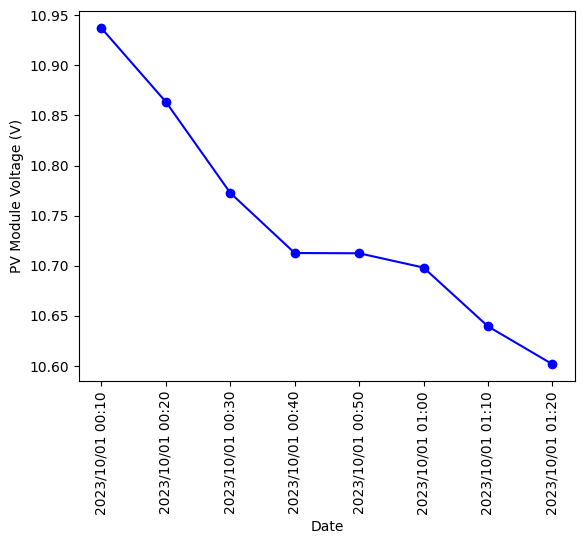

In [103]:
plt.plot(dataset[0],dataset[2],'o-b')
plt.xlabel('Date')
plt.ylabel('PV Module Voltage (V)')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2023/10/01 00:10'),
  Text(1, 0, '2023/10/01 00:20'),
  Text(2, 0, '2023/10/01 00:30'),
  Text(3, 0, '2023/10/01 00:40'),
  Text(4, 0, '2023/10/01 00:50'),
  Text(5, 0, '2023/10/01 01:00'),
  Text(6, 0, '2023/10/01 01:10'),
  Text(7, 0, '2023/10/01 01:20')])

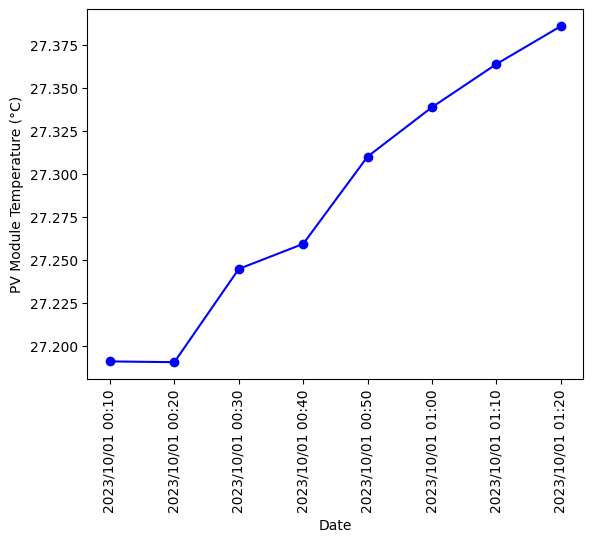

In [104]:
plt.plot(dataset[0],dataset[3],'o-b')
plt.xlabel('Date')
plt.ylabel('PV Module Temperature (°C)')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2023/10/01 00:10'),
  Text(1, 0, '2023/10/01 00:20'),
  Text(2, 0, '2023/10/01 00:30'),
  Text(3, 0, '2023/10/01 00:40'),
  Text(4, 0, '2023/10/01 00:50'),
  Text(5, 0, '2023/10/01 01:00'),
  Text(6, 0, '2023/10/01 01:10'),
  Text(7, 0, '2023/10/01 01:20')])

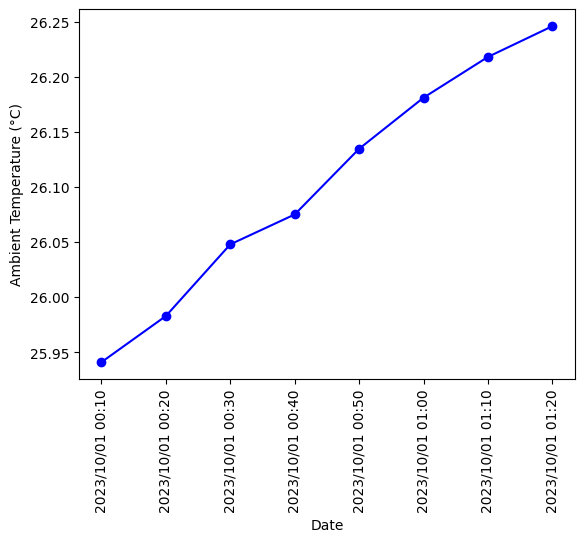

In [105]:
plt.plot(dataset[0],dataset[4],'o-b')
plt.xlabel('Date')
plt.ylabel('Ambient Temperature (°C)')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2023/10/01 00:10'),
  Text(1, 0, '2023/10/01 00:20'),
  Text(2, 0, '2023/10/01 00:30'),
  Text(3, 0, '2023/10/01 00:40'),
  Text(4, 0, '2023/10/01 00:50'),
  Text(5, 0, '2023/10/01 01:00'),
  Text(6, 0, '2023/10/01 01:10'),
  Text(7, 0, '2023/10/01 01:20')])

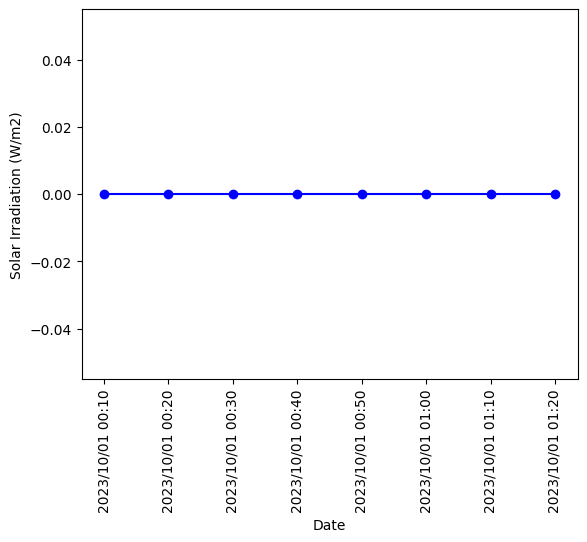

In [106]:
plt.plot(dataset[0],dataset[5],'o-b')
plt.xlabel('Date')
plt.ylabel('Solar Irradiation (W/m2)')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2023/10/01 00:10'),
  Text(1, 0, '2023/10/01 00:20'),
  Text(2, 0, '2023/10/01 00:30'),
  Text(3, 0, '2023/10/01 00:40'),
  Text(4, 0, '2023/10/01 00:50'),
  Text(5, 0, '2023/10/01 01:00'),
  Text(6, 0, '2023/10/01 01:10'),
  Text(7, 0, '2023/10/01 01:20')])

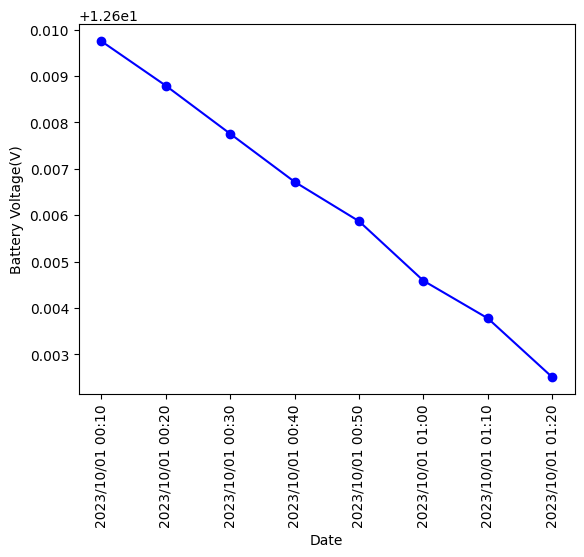

In [107]:
plt.plot(dataset[0],dataset[6],'o-b')
plt.xlabel('Date')
plt.ylabel('Battery Voltage(V)')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2023/10/01 00:10'),
  Text(1, 0, '2023/10/01 00:20'),
  Text(2, 0, '2023/10/01 00:30'),
  Text(3, 0, '2023/10/01 00:40'),
  Text(4, 0, '2023/10/01 00:50'),
  Text(5, 0, '2023/10/01 01:00'),
  Text(6, 0, '2023/10/01 01:10'),
  Text(7, 0, '2023/10/01 01:20')])

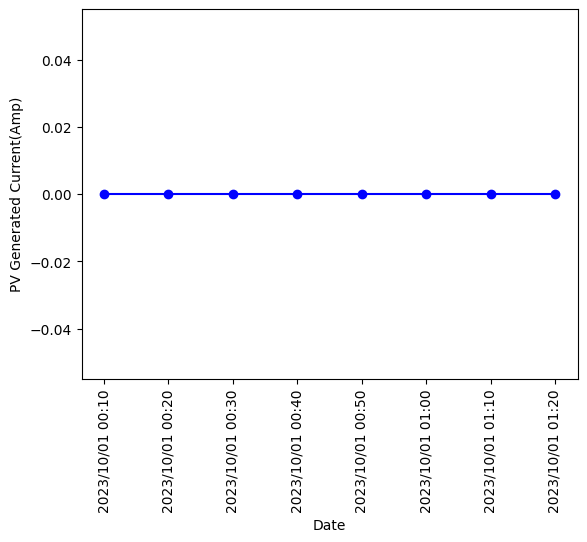

In [108]:
plt.plot(dataset[0],dataset[7],'o-b')
plt.xlabel('Date')
plt.ylabel('PV Generated Current(Amp)')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2023/10/01 00:10'),
  Text(1, 0, '2023/10/01 00:20'),
  Text(2, 0, '2023/10/01 00:30'),
  Text(3, 0, '2023/10/01 00:40'),
  Text(4, 0, '2023/10/01 00:50'),
  Text(5, 0, '2023/10/01 01:00'),
  Text(6, 0, '2023/10/01 01:10'),
  Text(7, 0, '2023/10/01 01:20')])

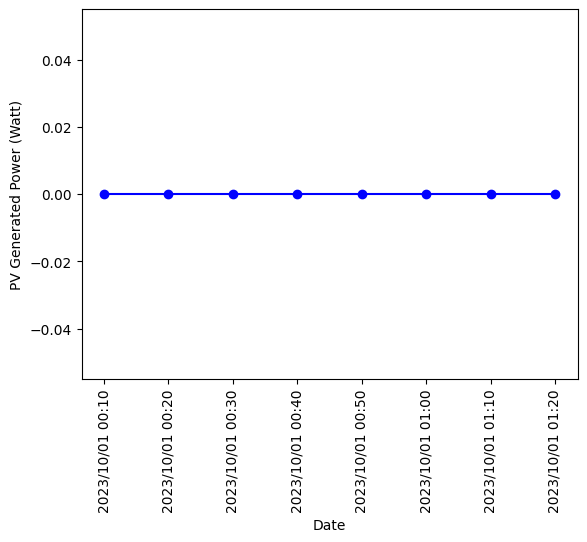

In [109]:
plt.plot(dataset[0],dataset[8],'o-b')
plt.xlabel('Date')
plt.ylabel('PV Generated Power (Watt)')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2023/10/01 00:10'),
  Text(1, 0, '2023/10/01 00:20'),
  Text(2, 0, '2023/10/01 00:30'),
  Text(3, 0, '2023/10/01 00:40'),
  Text(4, 0, '2023/10/01 00:50'),
  Text(5, 0, '2023/10/01 01:00'),
  Text(6, 0, '2023/10/01 01:10'),
  Text(7, 0, '2023/10/01 01:20')])

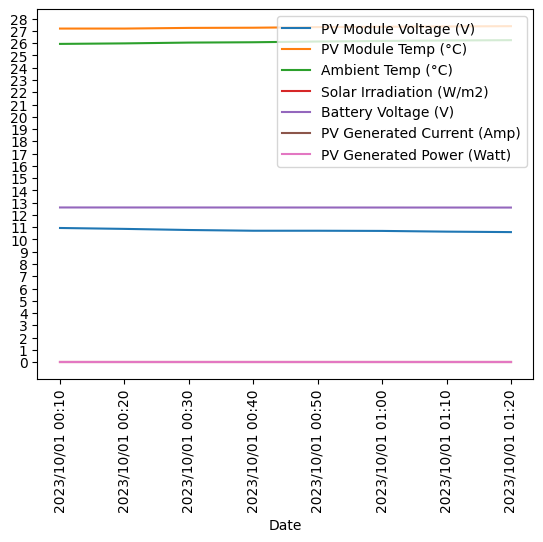

In [118]:

plt.plot(dataset[0],dataset[2])
plt.plot(dataset[0],dataset[3])
plt.plot(dataset[0],dataset[4])
plt.plot(dataset[0],dataset[5])
plt.plot(dataset[0],dataset[6])
plt.plot(dataset[0],dataset[7])
plt.plot(dataset[0],dataset[8])
plt.yticks(range(0, 29, 1))
plt.xlabel('Date')
plt.legend(['PV Module Voltage (V)','PV Module Temp (°C)','Ambient Temp (°C)','Solar Irradiation (W/m2)','Battery Voltage (V)','PV Generated Current (Amp)','PV Generated Power (Watt)'])
plt.xticks(rotation=90)